In [0]:
from google.colab import files
uploaded = files.upload()
print("OK")

Saving winequality-data.csv to winequality-data (1).csv
OK


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import sklearn.model_selection
import sklearn.linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('winequality-data.csv')

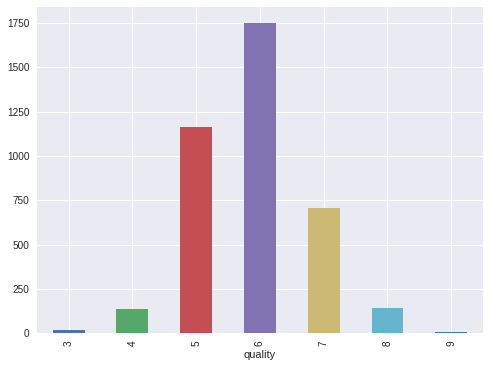

In [0]:
fig = plt.figure(figsize=(8,6))
df.groupby('quality').id.count().plot.bar(ylim=0)
plt.show()

In [0]:
df.head(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985
5,8.3,0.28,0.27,17.5,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6,986
6,6.8,0.14,0.35,1.5,0.047,40.0,117.0,0.99111,3.07,0.72,11.1,6,987
7,6.3,0.21,0.31,1.2,0.043,30.0,117.0,0.99158,3.49,0.68,11.0,6,988
8,6.7,0.31,0.08,1.3,0.038,58.0,147.0,0.99220,3.18,0.46,10.0,5,989
9,5.9,0.27,0.29,11.4,0.036,31.0,115.0,0.99490,3.35,0.48,10.5,8,990


In [0]:
bins = (1, 5, 6, 10)
group_names = ['poor','medium','high']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names, right = True)
df.head(10)

label_quality = LabelEncoder()

df['quality'] = label_quality.fit_transform(df['quality'])


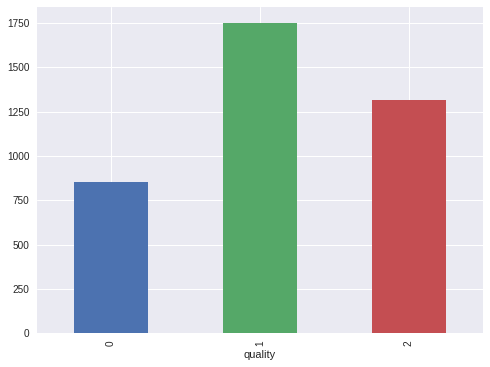

In [0]:
fig = plt.figure(figsize=(8,6))
df.groupby('quality').id.count().plot.bar(ylim=0)
plt.show()

In [0]:
df['quality']

In [0]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df.drop(['id','quality'],axis = 1),
                                                                            df['quality'],
                                                                            test_size = 0.2,
                                                                            random_state = 42)


In [0]:
model = SVC(gamma = 'auto')
model_svc = model.fit(X_train, y_train)

print("SVC, training error: %f" %
      sklearn.metrics.mean_absolute_error(y_train, model_svc.predict(X_train)))
print("SVC, testing error: %f" %
      sklearn.metrics.mean_absolute_error(y_test, model_svc.predict(X_test)))
print("SVC, acc train: %f" %
      accuracy_score(y_train, model_svc.predict(X_train)))
print("SVC, acc test : %f" %
      accuracy_score(y_test, model_svc.predict(X_test)))

print(classification_report(y_test, model_svc.predict(X_test)))
print(confusion_matrix(y_test, model_svc.predict(X_test)))
                

SVC, training error: 0.142310
SVC, testing error: 0.470663
SVC, acc train: 0.870453
SVC, acc test : 0.561224
              precision    recall  f1-score   support

           0       0.63      0.37      0.47       186
           1       0.52      0.76      0.62       340
           2       0.63      0.43      0.51       258

   micro avg       0.56      0.56      0.56       784
   macro avg       0.59      0.52      0.53       784
weighted avg       0.58      0.56      0.55       784

[[ 69 103  14]
 [ 30 259  51]
 [ 11 135 112]]


In [0]:
model = RandomForestClassifier()
model_random_forest = model.fit(X_train, y_train)

print("RFC, training error: %f" %
      sklearn.metrics.mean_absolute_error(y_train, model_random_forest.predict(X_train)))
print("RFC, testing error: %f" %
      sklearn.metrics.mean_absolute_error(y_test, model_random_forest.predict(X_test)))
print("RFC, acc train: %f" %
      accuracy_score(y_train, model_random_forest.predict(X_train)))
print("RFC, acc test : %f" %
      accuracy_score(y_test, model_random_forest.predict(X_test)))

print(classification_report(y_test, model_random_forest.predict(X_test)))
print(confusion_matrix(y_test, model_random_forest.predict(X_test)))

RFC, training error: 0.014040
RFC, testing error: 0.339286
RFC, acc train: 0.986599
RFC, acc test : 0.681122
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       186
           1       0.63      0.75      0.68       340
           2       0.76      0.61      0.68       258

   micro avg       0.68      0.68      0.68       784
   macro avg       0.70      0.67      0.68       784
weighted avg       0.69      0.68      0.68       784

[[122  56   8]
 [ 44 254  42]
 [  8  92 158]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2000, stop = 10000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
max_features2 = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
bootstrap2 = [True]
#
criterion = ['gini', 'entropy']
criterion2 = ['entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features2,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap2,
               'criterion': criterion2}


CV_rfc = GridSearchCV(estimator=model_random_forest, param_grid=random_grid, cv= 5,verbose = 1)
CV_rfc.fit(X_train, y_train)

In [0]:
CV_rfc.best_params_

In [0]:
model = RandomForestClassifier(bootstrap= True,criterion= 'gini',max_features= 'sqrt',
                               n_estimators= 6000)
model_random_forest = model.fit(X_train, y_train)

print("RFC, training error: %f" %
      sklearn.metrics.mean_absolute_error(y_train, model_random_forest.predict(X_train)))
print("RFC, testing error: %f" %
      sklearn.metrics.mean_absolute_error(y_test, model_random_forest.predict(X_test)))
print("RFC, acc train: %f" %
      accuracy_score(y_train, model_random_forest.predict(X_train)))
print("RFC, acc test : %f" %
      accuracy_score(y_test, model_random_forest.predict(X_test)))

print(classification_report(y_test, model_random_forest.predict(X_test)))
print(confusion_matrix(y_test, model_random_forest.predict(X_test)))

RFC, training error: 0.000000
RFC, testing error: 0.307398
RFC, acc train: 1.000000
RFC, acc test : 0.705357
              precision    recall  f1-score   support

           0       0.77      0.62      0.68       186
           1       0.65      0.77      0.70       340
           2       0.77      0.69      0.72       258

   micro avg       0.71      0.71      0.71       784
   macro avg       0.73      0.69      0.70       784
weighted avg       0.71      0.71      0.71       784

[[115  67   4]
 [ 29 261  50]
 [  6  75 177]]


In [0]:
model_random_forest.predict(np.array([6.7,0.15, 0.38, 1.7, 0.037, 20.0, 84.0, 0.99, 3.09, 0.53, 11.7],ndmin=2))

In [0]:
import pickle
filename = 'rfc_model.sav'
pickle.dump(model_random_forest, open(filename, 'wb'),protocol=2)
files.download(filename)

In [0]:
!ls